# YOLO

What is YOLO?
You Only Look Once. What is it? YOLO it's a very simple and fast algorithm that recognizes objects within an image in real time. It is made up by a single CNN and requires only one forward pass through the neural network in order to identify the objects.

How does it work?
1. The image is split in a grid that has the same dimension for each "tile".
2. We add the bounding boxes that identify each object. The bbox has the following format: [width, height, class, bx, by], where [bx, by] represents the center of the object.
3. Intersection Over Union: this technique is used so the bounding box "catches" the object fully (and doesn't leave any part of it uncovered, neither it is too large for the object). The IOU=1 if the predicted and actual box are identical.

Source: https://arxiv.org/abs/1506.02640

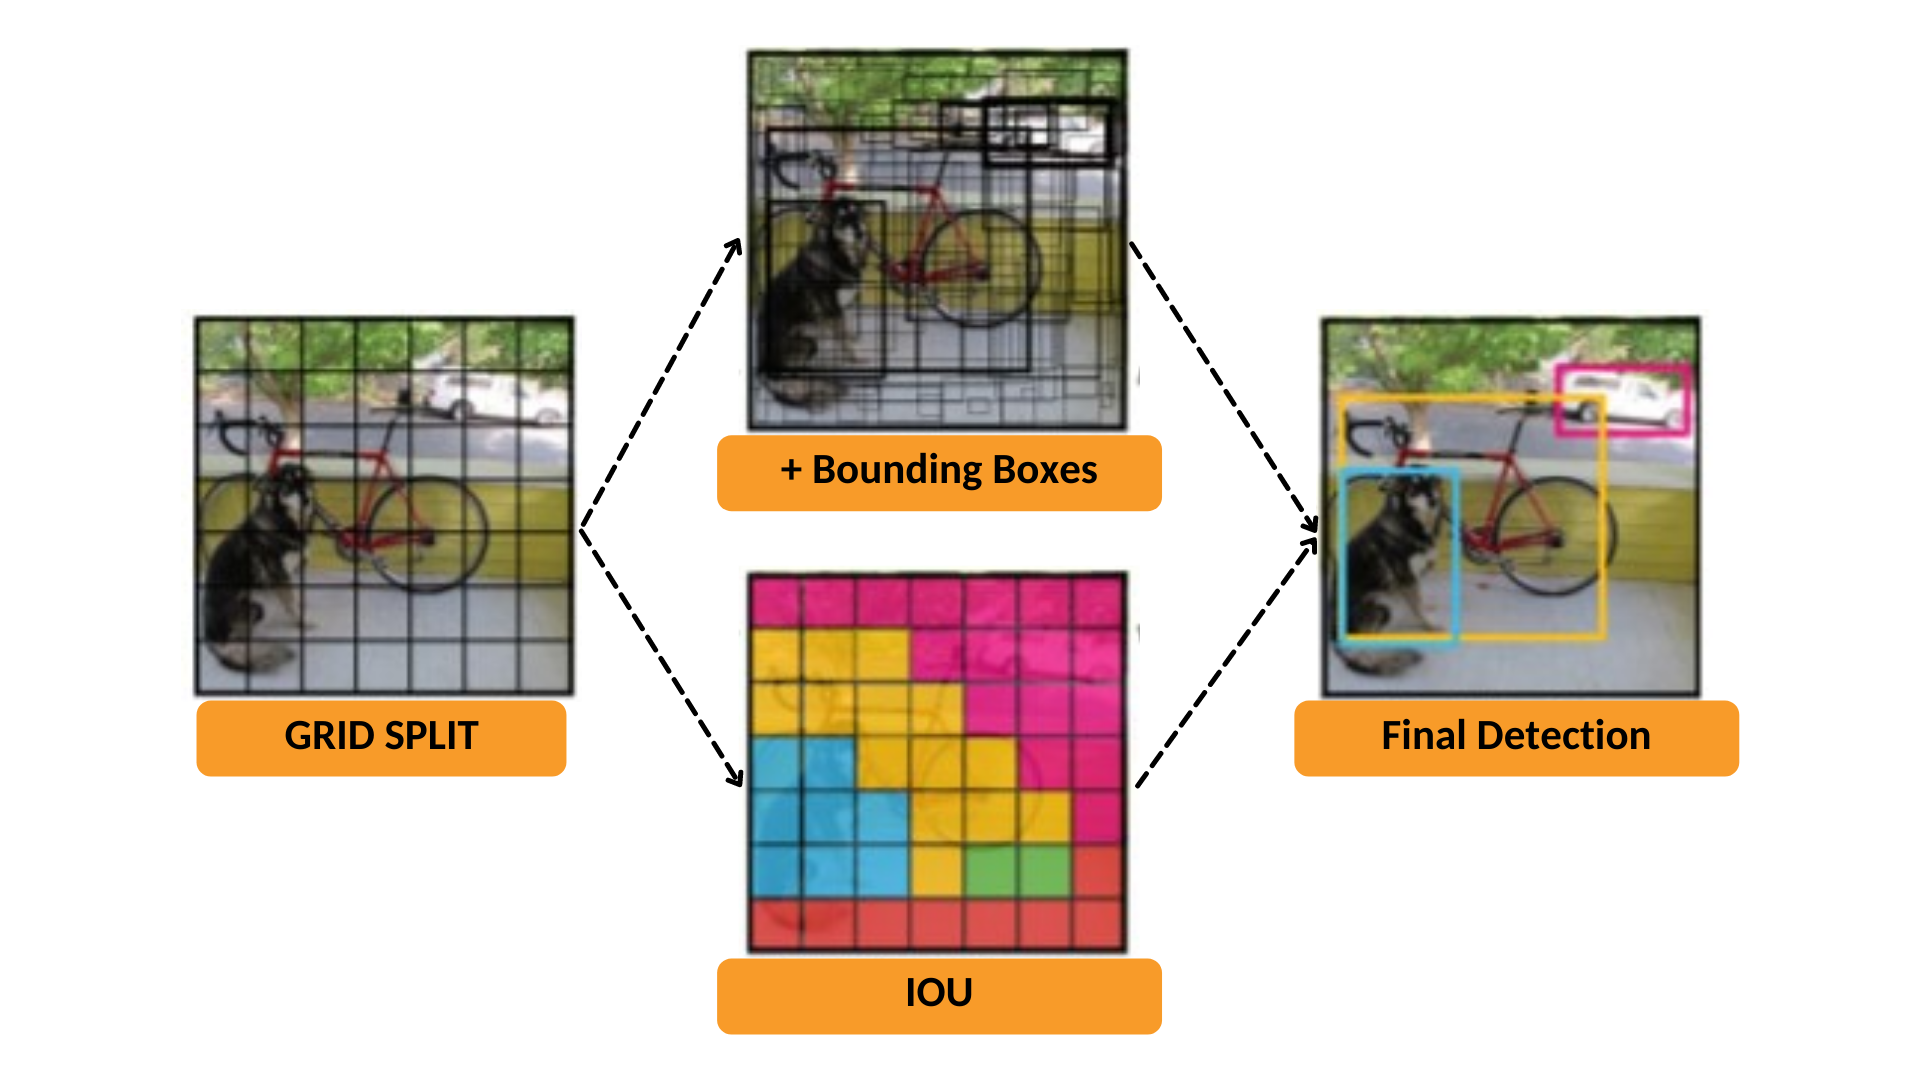

In [13]:
Image(filename="yolo.png", width=700)

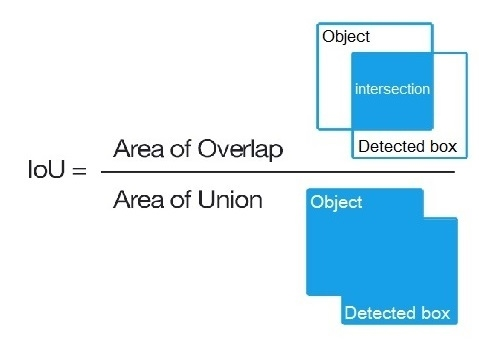

In [16]:
Image(filename="iou.jpg", width=300)

In [2]:
from os import listdir
from os.path import isfile, join
from random import randrange
from IPython.display import Image
from IPython.display import Video
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import moviepy.editor as moviepy

# EDA

<font size="4|">Dataset: https://public.roboflow.com/object-detection/pklot</font> 

In [3]:
trainPath = "pklot/train"
trainFolder = [f for f in listdir(trainPath) if isfile(join(trainPath, f))]
trainImages = []
for x in trainFolder:
    if ".jpg" in x:
        trainImages.append(trainPath + "/" + x)
len(trainImages)

8691

In [4]:
validationPath = "pklot/valid"
validationFolder = [f for f in listdir(validationPath) if isfile(join(validationPath, f))]
validationImages = []
for x in validationFolder:
    if ".jpg" in x:
        validationImages.append(validationPath + "/" + x)
len(validationImages)

2483

In [5]:
testPath = "pklot/test"
testFolder = [f for f in listdir(testPath) if isfile(join(testPath, f))]
testImages = []
for x in testFolder:
    if ".jpg" in x:
        testImages.append(testPath + "/" + x)
len(testImages)

1242

In [6]:
allImages = trainImages + validationImages + testImages
len(allImages)

12416

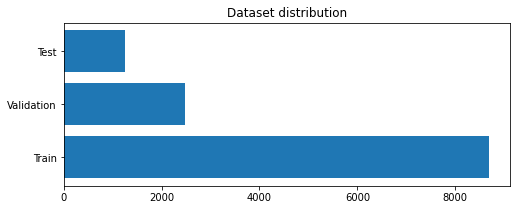

In [6]:
x = ['Train', 'Validation', 'Test']
y = [len(trainImages), len(validationImages), len(testImages)]

plt.figure(figsize=(8, 3))
plt.barh(x, y)
plt.title("Dataset distribution")
plt.show()

In [7]:
spaceEmpty = 376121
spaceOccupied = 335735

print("space-empty: " + str(spaceEmpty))
print("space-occupied: " + str(spaceOccupied))

space-empty: 376121
space-occupied: 335735


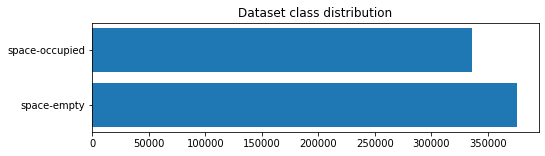

In [8]:
x = ['space-empty', 'space-occupied']
y = [spaceEmpty, spaceOccupied]

plt.figure(figsize=(8, 2))
plt.barh(x, y)
plt.title("Dataset class distribution")
plt.show()

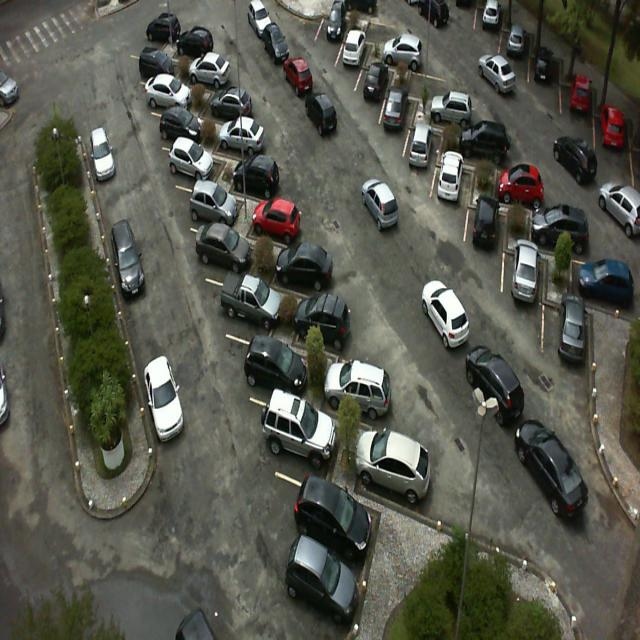

In [7]:
randomImage = allImages[randrange(len(allImages))]
Image(filename=randomImage, width=500)

In [8]:
txtRandomImage = randomImage.split(".jpg")[0] + ".txt"
f = open(txtRandomImage, "r")
print(f.read())
f.close()

1 0.540625 0.81953125 0.13046875 0.178125
1 0.4828125 0.67890625 0.11953125 0.1390625
1 0.4359375 0.57109375 0.10546875 0.125
1 0.3984375 0.47890625 0.09921875 0.1140625
1 0.3640625 0.39453125 0.090625 0.0890625
1 0.34375 0.3203125 0.08828125 0.090625
1 0.309375 0.2546875 0.08359375 0.0765625
1 0.284375 0.19609375 0.07578125 0.078125
1 0.27109375 0.1484375 0.071875 0.0640625
1 0.25078125 0.103125 0.0671875 0.0640625
1 0.6234375 0.728125 0.10546875 0.128125
1 0.55078125 0.6125 0.1109375 0.121875
1 0.51875 0.50390625 0.09453125 0.10859375
1 0.475 0.415625 0.1015625 0.096875
1 0.44453125 0.3421875 0.0953125 0.084375
1 0.41484375 0.271875 0.090625 0.08046875
1 0.3859375 0.2171875 0.07734375 0.06796875
1 0.359375 0.16015625 0.08671875 0.0765625
1 0.334375 0.11796875 0.06953125 0.05546875
1 0.3078125 0.07734375 0.06953125 0.05703125
1 0.884375 0.52890625 0.0765625 0.1109375
1 0.81640625 0.43203125 0.0625 0.1109375
1 0.7609375 0.36796875 0.0609375 0.11640625
1 0.70625 0.303125 0.06484375 0.09

Isi file anotasi bounding box dari gambar di atas<br>
0 = space-empty<br>
1 = space-occupied

# Object Detection

## Training

In [11]:
# !darknet detector train pklot/obj.data pklot/yolo-obj.cfg yolov4.conv.137 -map

In [12]:
weightPath = "backup"
weightFolder = [f for f in listdir(weightPath) if isfile(join(weightPath, f))]
for x in weightFolder:
    print(x)

yolo-obj_1000.weights
yolo-obj_2000.weights
yolo-obj_3000.weights
yolo-obj_4000.weights
yolo-obj_5000.weights
yolo-obj_6000.weights
yolo-obj_best.weights
yolo-obj_final.weights
yolo-obj_last.weights


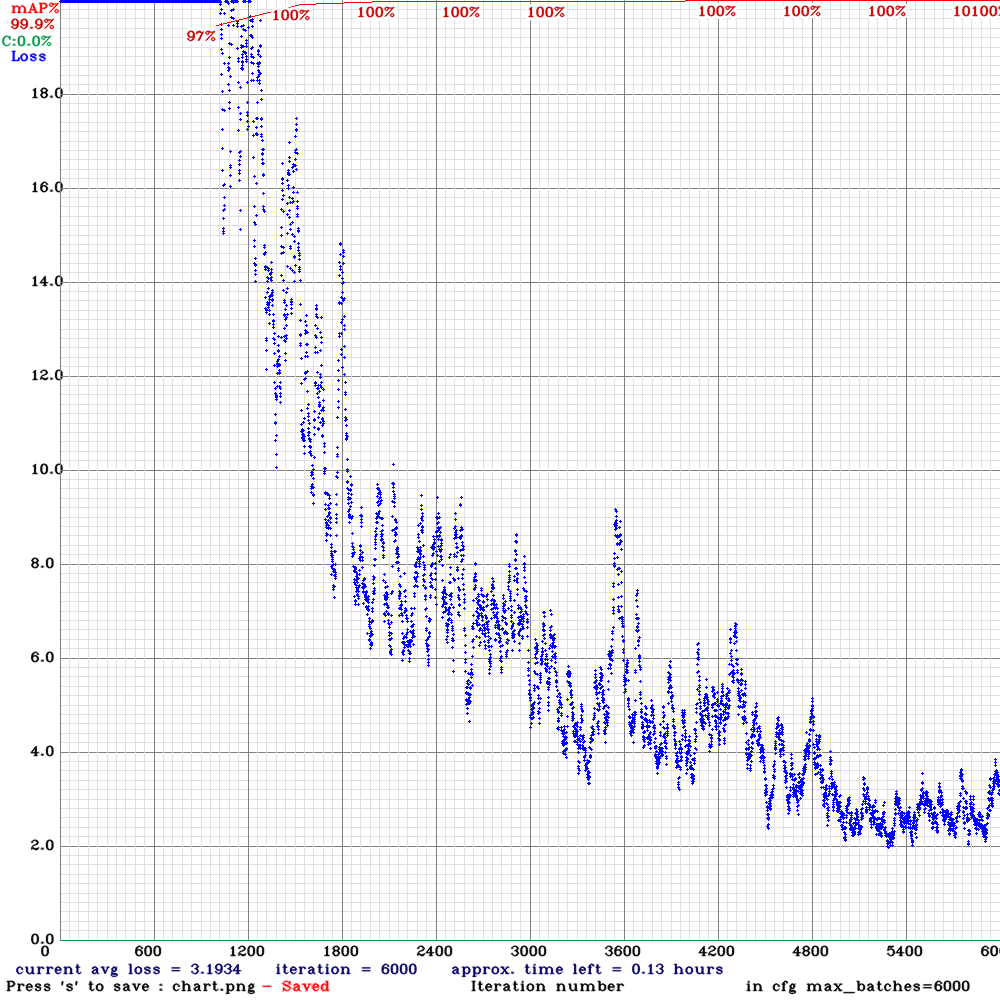

In [13]:
Image(filename='chart_yolo-obj.png', width=800)

## Validation

In [17]:
!darknet detector map pklot/obj.data pklot/yolo-obj.cfg backup/yolo-obj_1000.weights

net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 64 K-images (1 Kilo-batches_64) 

 calculation mAP (mean average precision)...
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 

 detections_count = 531007, unique_truth_count = 143316  
 rank = 0 of ranks = 531007 
 rank = 100 of ranks = 531007 
 rank = 200 of ranks = 531007 
 rank = 300 of ranks = 531007 
 rank = 400 of ranks = 531007 
 rank = 500 of ranks = 531007 
 rank = 600 of ranks = 531007 
 rank = 700 of ranks = 531007 
 rank = 800 of ranks = 531007 
 rank = 900 of ranks = 531007 
 rank = 1000 of ranks = 531007 
 rank = 1100 of ranks = 531007 
 rank = 1200 of ranks = 531007 
 rank = 1300 of ranks = 531007 
 rank = 1400 of ranks = 531007 
 rank = 1500 o

 CUDA-version: 11020 (11060), cuDNN: 8.1.0, GPU count: 1  
 OpenCV version: 4.5.5
 0 : compute_capability = 860, cudnn_half = 0, GPU: NVIDIA GeForce RTX 3060 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   9 route  8 2 	                           ->  160 x 160 x 128 
  10 conv

 rank = 3900 of ranks = 531007 
 rank = 4000 of ranks = 531007 
 rank = 4100 of ranks = 531007 
 rank = 4200 of ranks = 531007 
 rank = 4300 of ranks = 531007 
 rank = 4400 of ranks = 531007 
 rank = 4500 of ranks = 531007 
 rank = 4600 of ranks = 531007 
 rank = 4700 of ranks = 531007 
 rank = 4800 of ranks = 531007 
 rank = 4900 of ranks = 531007 
 rank = 5000 of ranks = 531007 
 rank = 5100 of ranks = 531007 
 rank = 5200 of ranks = 531007 
 rank = 5300 of ranks = 531007 
 rank = 5400 of ranks = 531007 
 rank = 5500 of ranks = 531007 
 rank = 5600 of ranks = 531007 
 rank = 5700 of ranks = 531007 
 rank = 5800 of ranks = 531007 
 rank = 5900 of ranks = 531007 
 rank = 6000 of ranks = 531007 
 rank = 6100 of ranks = 531007 
 rank = 6200 of ranks = 531007 
 rank = 6300 of ranks = 531007 
 rank = 6400 of ranks = 531007 
 rank = 6500 of ranks = 531007 
 rank = 6600 of ranks = 531007 
 rank = 6700 of ranks = 531007 
 rank = 6800 of ranks = 531007 
 rank = 6900 of ranks = 531007 
 rank = 

  35 conv    128       3 x 3/ 1     40 x  40 x 128 ->   40 x  40 x 128 0.472 BF
  36 Shortcut Layer: 33,  wt = 0, wn = 0, outputs:  40 x  40 x 128 0.000 BF
  37 conv    128       1 x 1/ 1     40 x  40 x 128 ->   40 x  40 x 128 0.052 BF
  38 conv    128       3 x 3/ 1     40 x  40 x 128 ->   40 x  40 x 128 0.472 BF
  39 Shortcut Layer: 36,  wt = 0, wn = 0, outputs:  40 x  40 x 128 0.000 BF
  40 conv    128       1 x 1/ 1     40 x  40 x 128 ->   40 x  40 x 128 0.052 BF
  41 conv    128       3 x 3/ 1     40 x  40 x 128 ->   40 x  40 x 128 0.472 BF
  42 Shortcut Layer: 39,  wt = 0, wn = 0, outputs:  40 x  40 x 128 0.000 BF
  43 conv    128       1 x 1/ 1     40 x  40 x 128 ->   40 x  40 x 128 0.052 BF
  44 conv    128       3 x 3/ 1     40 x  40 x 128 ->   40 x  40 x 128 0.472 BF
  45 Shortcut Layer: 42,  wt = 0, wn = 0, outputs:  40 x  40 x 128 0.000 BF
  46 conv    128       1 x 1/ 1     40 x  40 x 128 ->   40 x  40 x 128 0.052 BF
  47 conv    128       3 x 3/ 1     40 x  40 x 128 ->   

In [28]:
epoch1000 = 97.28
epoch2000 = 99.72
epoch3000 = 99.87
epoch4000 = 99.90
epoch5000 = 99.92
epoch6000 = 99.93

print("1000 epoch: " + str(epoch1000) + "%")
print("2000 epoch: " + str(epoch2000) + "%")
print("3000 epoch: " + str(epoch3000) + "%")
print("4000 epoch: " + str(epoch4000) + "%")
print("5000 epoch: " + str(epoch5000) + "%")
print("6000 epoch: " + str(epoch6000) + "%")

1000 epoch: 97.28%
2000 epoch: 99.72%
3000 epoch: 99.87%
4000 epoch: 99.9%
5000 epoch: 99.92%
6000 epoch: 99.93%


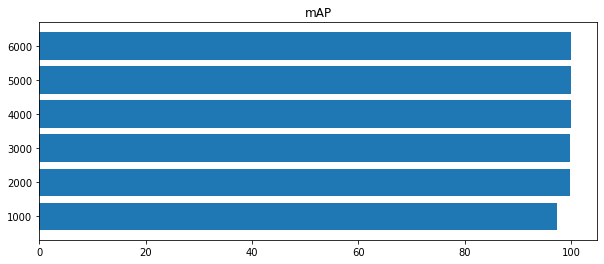

In [29]:
x = ['1000', '2000', '3000', '4000', '5000', '6000']
y = [97.28, 99.72, 99.87, 99.90, 99.92, 99.93]

plt.figure(figsize=(10, 4))
plt.barh(x, y)
plt.title("mAP")
plt.show()

## Testing

### Random Image

In [14]:
randomTestImage = testImages[randrange(len(testImages))]
!darknet detector test pklot/obj.data pklot/yolo-obj.cfg -dont_show backup/yolo-obj_final.weights $randomTestImage -i 0 -thresh 0.25

net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 384 K-images (6 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
pklot/test/2012-09-20_07_59_18_jpg.rf.49adc24e94dcbceb4a9bd9bd172fe08e.jpg: Predicted in 40.749000 milli-seconds.
space-empty: 100%
space-empty: 100%
space-empty: 96%
space-occupied: 100%
space-occupied: 100%
space-empty: 100%
space-occupied: 100%
space-occupied: 100%
space-occupied: 99%
space-occupied: 100%
space-empty: 100%
space-occupied: 100%
space-occupied: 100%
space-occupied: 100%
space-occupied: 100%
space-occupied: 100%
space-empty: 100%
space-occupied: 100%
space-occupied: 100%
space-occupied: 100%
space-occupied: 100%
space-occupied: 100%
space-occupied: 100%
space-emp

 CUDA-version: 11020 (11060), cuDNN: 8.1.0, GPU count: 1  
 OpenCV version: 4.5.5
 0 : compute_capability = 860, cudnn_half = 0, GPU: NVIDIA GeForce RTX 3060 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   9 route  8 2 	                           ->  160 x 160 x 128 
  10 conv

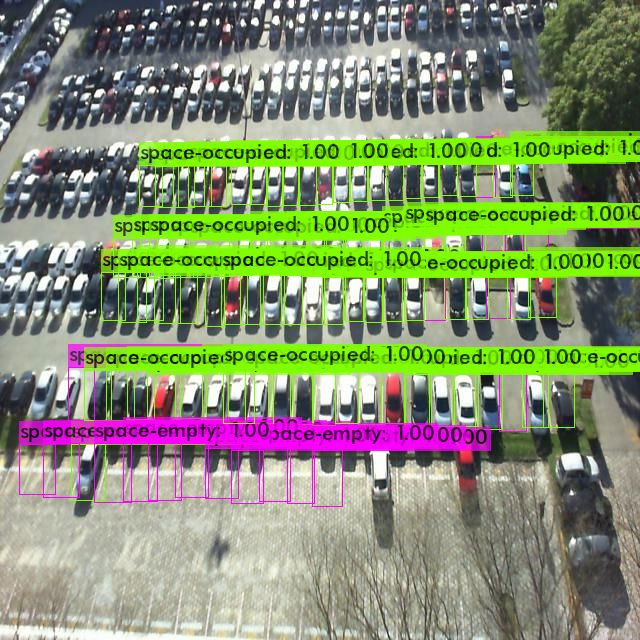

In [15]:
Image(filename='predictions.jpg', width=500)

In [30]:
randomTestImage = testImages[randrange(len(testImages))]
!darknet detector test pklot/obj.data pklot/yolo-obj.cfg -dont_show backup/yolo-obj_final.weights $randomTestImage -i 0 -thresh 0.25

net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 

 CUDA-version: 11020 (11060), cuDNN: 8.1.0, GPU count: 1  
 OpenCV version: 4.5.5
 0 : compute_capability = 860, cudnn_half = 0, GPU: NVIDIA GeForce RTX 3060 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   9 route  8 2 	                           ->  160 x 160 x 128 
  10 conv


Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 384 K-images (6 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
pklot/test/2012-10-27_11_20_51_jpg.rf.60a0ae931f753b09d50d0e8e7496e791.jpg: Predicted in 48.579000 milli-seconds.
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-occupied: 100%
space-empty: 100%
space-empty: 100%
space-occupied: 100%
space-empty: 99%
space-empty: 100%
space-empty: 100%
space-occupied: 100%
space-occupied: 99%
space-occupied: 100%
space-occupied: 100%
space-empty: 100%
space-occupied: 100%
space-occupied: 100%
space-occupied: 100%
space-occupied: 100%
space-empty: 100%
space-occupied: 99%
space-occupied: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-occupied: 100%
space-occupied: 100%
space-emp

  58 conv    256       1 x 1/ 1     20 x  20 x 512 ->   20 x  20 x 256 0.105 BF
  59 conv    256       1 x 1/ 1     20 x  20 x 256 ->   20 x  20 x 256 0.052 BF
  60 conv    256       3 x 3/ 1     20 x  20 x 256 ->   20 x  20 x 256 0.472 BF
  61 Shortcut Layer: 58,  wt = 0, wn = 0, outputs:  20 x  20 x 256 0.000 BF
  62 conv    256       1 x 1/ 1     20 x  20 x 256 ->   20 x  20 x 256 0.052 BF
  63 conv    256       3 x 3/ 1     20 x  20 x 256 ->   20 x  20 x 256 0.472 BF
  64 Shortcut Layer: 61,  wt = 0, wn = 0, outputs:  20 x  20 x 256 0.000 BF
  65 conv    256       1 x 1/ 1     20 x  20 x 256 ->   20 x  20 x 256 0.052 BF
  66 conv    256       3 x 3/ 1     20 x  20 x 256 ->   20 x  20 x 256 0.472 BF
  67 Shortcut Layer: 64,  wt = 0, wn = 0, outputs:  20 x  20 x 256 0.000 BF
  68 conv    256       1 x 1/ 1     20 x  20 x 256 ->   20 x  20 x 256 0.052 BF
  69 conv    256       3 x 3/ 1     20 x  20 x 256 ->   20 x  20 x 256 0.472 BF
  70 Shortcut Layer: 67,  wt = 0, wn = 0, outputs:  


space-occupied: 100%
space-occupied: 100%
space-occupied: 100%


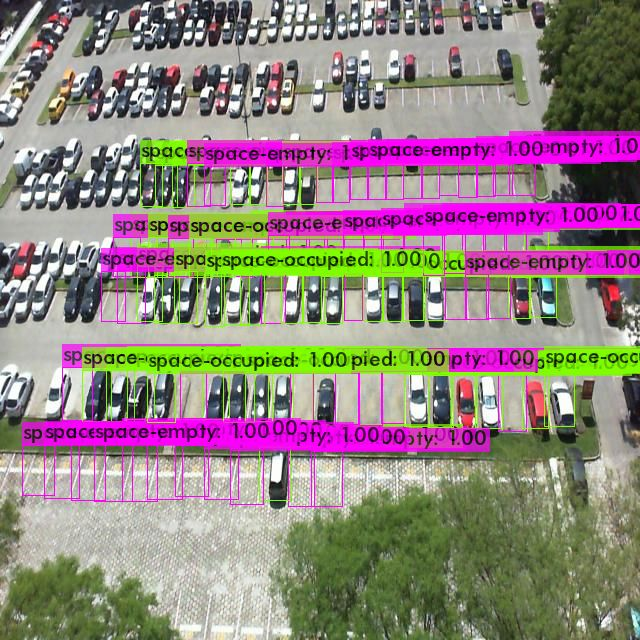

In [31]:
Image(filename='predictions.jpg', width=500)

### Video

In [22]:
# !darknet detector demo pklot/obj.data pklot/yolo-obj.cfg backup/yolo-obj_final.weights pklot/test.mp4 -dont_show -ext_output -out_filename pklot/test-result.avi

# clip = moviepy.VideoFileClip("pklot/test-result.avi")
# clip.write_videofile("pklot/test-result.mp4")

Moviepy - Building video pklot/test-result.mp4.
Moviepy - Writing video pklot/test-result.mp4



Moviepy - Done !
Moviepy - video ready pklot/test-result.mp4


In [24]:
Video("pklot/test-result.mp4")